# Evaluation of all models

**Comparison of all models**:

**ML:**
- Logistic Regression
- Random Forest
- Support Vector Machine
- Deep Neural Network (Multilayer Perceptron)
- Naive Bayes
- K-Nearest Neighbors

**LLMs:**
- GPT (OpenAI)
- Gemini
- Gemma
- Claude
- DeepSeek
- Grok

## 0 Imports

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import holoviews as hv
import plotly.graph_objects as go
from holoviews import opts
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, recall_score, matthews_corrcoef, accuracy_score
from sklearn.model_selection import train_test_split

In [83]:
data_change = pd.read_csv("../dat/dips/DIPS_Data_cleaned_change.csv", sep = ",", low_memory = False)

In [84]:
y_pred_lr = pd.read_csv("y_pred_ML/y_pred_lr.csv", sep = ",")
y_pred_rf = pd.read_csv("y_pred_ML/y_pred_rf.csv", sep = ",")
y_pred_svc = pd.read_csv("y_pred_ML/y_pred_svc.csv", sep = ",")
y_pred_dnn = pd.read_csv("y_pred_ML/y_pred_dnn.csv", sep = ",")
y_pred_knn = pd.read_csv("y_pred_ML/y_pred_knn.csv", sep = ",")
y_pred_nb = pd.read_csv("y_pred_ML/y_pred_nb.csv", sep = ",")
y_pred_xgb = pd.read_csv("y_pred_ML/y_pred_xgb.csv", sep = ",")

In [85]:
y_pred_GPT_simple_prompt = pd.read_csv("y_pred_LLMs/GPT/y_pred_GPT_simple_prompt.csv", sep = ",")
y_pred_GPT_class_def_prompt = pd.read_csv("y_pred_LLMs/GPT/y_pred_GPT_class_definitions_prompt.csv", sep = ",")
y_pred_GPT_profiled_simple_prompt = pd.read_csv("y_pred_LLMs/GPT/y_pred_GPT_profiled_simple_prompt.csv", sep = ",")
y_pred_GPT_few_shot_prompt = pd.read_csv("y_pred_LLMs/GPT/y_pred_GPT_few_shot_prompt.csv", sep = ",")
y_pred_GPT_vignette_prompt = pd.read_csv("y_pred_LLMs/GPT/y_pred_GPT_vignette_prompt.csv", sep = ",")
y_pred_GPT_cot_prompt = pd.read_csv("y_pred_LLMs/GPT/y_pred_GPT_cot_prompt.csv", sep = ",")

In [86]:
y_pred_GPT_o3_simple_prompt_nothinking = pd.read_csv("y_pred_LLMs/GPT/y_pred_GPT_o3_simple_prompt_nothinking.csv", sep = ",")
y_pred_GPT_o3_simple_prompt = pd.read_csv("y_pred_LLMs/GPT/y_pred_GPT_o3_simple_prompt.csv", sep = ",")
y_pred_GPT_o3_class_definitions_prompt = pd.read_csv("y_pred_LLMs/GPT/y_pred_GPT_o3_class_definitions_prompt.csv", sep = ",")
y_pred_GPT_o3_profiled_simple_prompt = pd.read_csv("y_pred_LLMs/GPT/y_pred_GPT_o3_profiled_simple_prompt.csv", sep = ",")
y_pred_GPT_o3_few_shot_prompt = pd.read_csv("y_pred_LLMs/GPT/y_pred_GPT_o3_few_shot_prompt.csv", sep = ",")
y_pred_GPT_o3_vignette_prompt = pd.read_csv("y_pred_LLMs/GPT/y_pred_GPT_o3_vignette_prompt.csv", sep = ",")

In [87]:
y_pred_Gemini_simple_prompt = pd.read_csv("y_pred_LLMs/Gemini/y_pred_gemini_simple_prompt.csv", sep = ",")
y_pred_Gemini_class_def_prompt = pd.read_csv("y_pred_LLMs/Gemini/y_pred_gemini_class_definitions_prompt.csv", sep = ",")
y_pred_Gemini_profiled_simple_prompt = pd.read_csv("y_pred_LLMs/Gemini/y_pred_gemini_profiled_simple_prompt.csv", sep = ",")
y_pred_Gemini_few_shot_prompt = pd.read_csv("y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt.csv", sep = ",")
y_pred_Gemini_vignette_prompt = pd.read_csv("y_pred_LLMs/Gemini/y_pred_gemini_vignette_prompt.csv", sep = ",")

In [88]:
y_pred_Gemma_simple_prompt = pd.read_csv("y_pred_LLMs/Gemma/y_pred_gemma_simple_prompt.csv", sep = ",")
y_pred_Gemma_class_def_prompt = pd.read_csv("y_pred_LLMs/Gemma/y_pred_gemma_class_definitions_prompt.csv", sep = ",")
y_pred_Gemma_profiled_simple_prompt = pd.read_csv("y_pred_LLMs/Gemma/y_pred_gemma_profiled_simple_prompt.csv", sep = ",")
y_pred_Gemma_few_shot_prompt = pd.read_csv("y_pred_LLMs/Gemma/y_pred_gemma_few_shot_prompt.csv", sep = ",")
y_pred_Gemma_vignette_prompt = pd.read_csv("y_pred_LLMs/Gemma/y_pred_gemma_vignette_prompt.csv", sep = ",")

In [89]:
y_pred_Claude_4_simple_prompt = pd.read_csv("y_pred_LLMs/Claude/y_pred_claude_4_simple_prompt.csv", sep = ",")
y_pred_Claude_4_class_def_prompt = pd.read_csv("y_pred_LLMs/Claude/y_pred_claude_4_class_definitions_prompt.csv", sep = ",")
y_pred_Claude_4_profiled_simple_prompt = pd.read_csv("y_pred_LLMs/Claude/y_pred_claude_profiled_simple_prompt.csv", sep = ",")
y_pred_Claude_4_few_shot_prompt = pd.read_csv("y_pred_LLMs/Claude/y_pred_claude_few_shot_prompt.csv", sep = ",")
y_pred_Claude_4_vignette_prompt = pd.read_csv("y_pred_LLMs/Claude/y_pred_claude_vignette_prompt.csv", sep = ",")

In [90]:
y_pred_DeepSeek_simple_prompt = pd.read_csv("y_pred_LLMs/DeepSeek/y_pred_deeps_simple_prompt.csv", sep = ",")
y_pred_DeepSeek_class_def_prompt = pd.read_csv("y_pred_LLMs/DeepSeek/y_pred_deeps_class_definitions_prompt.csv", sep = ",")
y_pred_DeepSeek_profiled_simple_prompt = pd.read_csv("y_pred_LLMs/DeepSeek/y_pred_deeps_profiled_simple_prompt.csv", sep = ",")
y_pred_DeepSeek_few_shot_prompt = pd.read_csv("y_pred_LLMs/DeepSeek/y_pred_deeps_few_shot_prompt.csv", sep = ",")
y_pred_DeepSeek_vignette_prompt = pd.read_csv("y_pred_LLMs/DeepSeek/y_pred_deeps_vignette_prompt.csv", sep =",")

In [91]:
y_pred_Grok_simple_prompt = pd.read_csv("y_pred_LLMs/Grok/y_pred_Grok_simple_prompt.csv", sep = ",")
y_pred_Grok_class_def_prompt = pd.read_csv("y_pred_LLMs/Grok/y_pred_Grok_class_definitions_prompt.csv", sep = ",")
y_pred_Grok_profiled_simple_prompt = pd.read_csv("y_pred_LLMs/Grok/y_pred_Grok_profiled_simple_prompt.csv", sep = ",")
y_pred_Grok_few_shot_prompt = pd.read_csv("y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt.csv", sep = ",")
y_pred_Grok_vignette_prompt = pd.read_csv("y_pred_LLMs/Grok/y_pred_Grok_vignette_prompt.csv", sep = ",")
y_pred_Grok_cot_prompt = pd.read_csv("y_pred_LLMs/Grok/y_pred_Grok_cot_prompt.csv", sep = ",")

In [92]:
# time
time_lr = pd.read_csv("../exp/times_ML/time_lr.csv", sep = ",")
time_rf = pd.read_csv("../exp/times_ML/time_rf.csv", sep = ",")
time_svc = pd.read_csv("../exp/times_ML/time_svc.csv", sep = ",")
time_dnn = pd.read_csv("../exp/times_ML/time_dnn.csv", sep = ",")
time_knn = pd.read_csv("../exp/times_ML/time_knn.csv", sep = ",")
time_nb = pd.read_csv("../exp/times_ML/time_nb.csv", sep = ",")
time_xgb = pd.read_csv("../exp/times_ML/time_xgb.csv", sep = ",")

In [93]:
time_GPT_simple_prompt = pd.read_csv("times_LLMs/GPT/time_GPT_simple_prompt.csv", sep = ",")
time_GPT_class_def_prompt = pd.read_csv("times_LLMs/GPT/time_GPT_class_definitions_prompt.csv", sep = ",")
time_GPT_profiled_simple_prompt = pd.read_csv("times_LLMs/GPT/time_GPT_profiled_simple_prompt.csv", sep = ",")
time_GPT_few_shot_prompt = pd.read_csv("times_LLMs/GPT/time_GPT_few_shot_prompt.csv", sep = ",")
time_GPT_vignette_prompt = pd.read_csv("times_LLMs/GPT/time_GPT_vignette_prompt.csv", sep = ",")
time_GPT_cot_prompt = pd.read_csv("times_LLMs/GPT/time_GPT_cot_prompt.csv", sep = ",")

In [94]:
time_GPT_o3_simple_prompt_nothinking = pd.read_csv("times_LLMs/GPT/time_GPT_o3_simple_prompt_nothinking.csv", sep = ",")
time_GPT_o3_simple_prompt = pd.read_csv("times_LLMs/GPT/time_GPT_o3_simple_prompt.csv", sep = ",")
time_GPT_o3_class_definitions_prompt = pd.read_csv("times_LLMs/GPT/time_GPT_o3_class_definitions_prompt.csv", sep = ",")
time_GPT_o3_profiled_simple_prompt = pd.read_csv("times_LLMs/GPT/time_GPT_o3_profiled_simple_prompt.csv", sep = ",")
time_GPT_o3_few_shot_prompt = pd.read_csv("times_LLMs/GPT/time_GPT_o3_few_shot_prompt.csv", sep = ",")
time_GPT_o3_vignette_prompt = pd.read_csv("times_LLMs/GPT/time_GPT_o3_vignette_prompt.csv", sep = ",")

In [46]:
time_Gemini_simple_prompt = pd.read_csv("times_LLMs/Gemini/time_gemini_simple_prompt.csv", sep = ",")
time_Gemini_class_def_prompt = pd.read_csv("times_LLMs/Gemini/time_gemini_class_definitions_prompt.csv", sep = ",")
time_Gemini_profiled_simple_prompt = pd.read_csv("times_LLMs/Gemini/time_gemini_profiled_simple_prompt.csv", sep = ",")
time_Gemini_few_shot_prompt = pd.read_csv("times_LLMs/Gemini/time_gemini_few_shot_prompt.csv", sep = ",")
time_Gemini_vignette_prompt = pd.read_csv("times_LLMs/Gemini/time_gemini_vignette_prompt.csv", sep = ",")

In [47]:
time_Gemma_simple_prompt = pd.read_csv("times_LLMs/Gemma/time_gemma_simple_prompt.csv", sep = ",")
time_Gemma_class_def_prompt = pd.read_csv("times_LLMs/Gemma/time_gemma_class_definitions_prompt.csv", sep = ",")
time_Gemma_profiled_simple_prompt = pd.read_csv("times_LLMs/Gemma/time_gemma_profiled_simple_prompt.csv", sep = ",")
time_Gemma_few_shot_prompt = pd.read_csv("times_LLMs/Gemma/time_gemma_few_shot_prompt.csv", sep = ",")
time_Gemma_vignette_prompt = pd.read_csv("times_LLMs/Gemma/time_gemma_vignette_prompt.csv", sep = ",")

In [48]:
time_Claude_4_simple_prompt = pd.read_csv("times_LLMs/Claude/time_claude_4_simple_prompt.csv", sep = ",")
time_Claude_4_class_def_prompt = pd.read_csv("times_LLMs/Claude/time_claude_4_class_definitions_prompt.csv", sep = ",")
time_Claude_4_profiled_simple_prompt = pd.read_csv("times_LLMs/Claude/time_claude_profiled_simple_prompt.csv", sep = ",")
time_Claude_4_few_shot_prompt = pd.read_csv("times_LLMs/Claude/time_claude_few_shot_prompt.csv", sep = ",")
time_Claude_4_vignette_prompt = pd.read_csv("times_LLMs/Claude/time_claude_vignette_prompt.csv", sep = ",")

In [49]:
time_DeepSeek_simple_prompt = pd.read_csv("times_LLMs/DeepSeek/time_deeps_simple_prompt.csv", sep = ",")
time_DeepSeek_class_def_prompt = pd.read_csv("times_LLMs/DeepSeek/time_deeps_class_definitions_prompt.csv", sep = ",")
time_DeepSeek_profiled_simple_prompt = pd.read_csv("times_LLMs/DeepSeek/time_deeps_profiled_simple_prompt.csv", sep = ",")
time_DeepSeek_few_shot_prompt = pd.read_csv("times_LLMs/DeepSeek/time_deeps_few_shot_prompt.csv", sep = ",")
time_DeepSeek_vignette_prompt = pd.read_csv("times_LLMs/DeepSeek/time_deeps_vignette_prompt.csv", sep =",")

In [50]:
time_Grok_simple_prompt = pd.read_csv("times_LLMs/Grok/time_grok_simple_prompt.csv", sep = ",")
time_Grok_class_def_prompt = pd.read_csv("times_LLMs/Grok/time_grok_class_definitions_prompt.csv", sep = ",")
time_Grok_profiled_simple_prompt = pd.read_csv("times_LLMs/Grok/time_grok_profiled_simple_prompt.csv", sep = ",")
time_Grok_few_shot_prompt = pd.read_csv("times_LLMs/Grok/time_grok_few_shot_prompt.csv", sep = ",")
time_Grok_vignette_prompt = pd.read_csv("times_LLMs/Grok/time_grok_vignette_prompt.csv", sep = ",")
time_Grok_cot_prompt = pd.read_csv("times_LLMs/Grok/time_grok_cot_prompt.csv", sep = ",")

In [99]:
time = time_GPT_cot_prompt
print("Total hours needed:", round(time.iloc[0, 0] // 60 / 60, 2))
print("Total minutes needed:", time.iloc[0, 0] // 60)
print("Seconds per prompt:", time.iloc[0, 0] / 246)

Total hours needed: 0.3
Total minutes needed: 18.0
Seconds per prompt: 4.492479593773198


### Unification Approaches

In [103]:
y_pred_pov_all_models = pd.read_csv("../exp/y_pred_unification/proportion_of_votes/y_pred_pov_all_models.csv", sep = ",")
y_pred_pov_ml_votes = pd.read_csv("../exp/y_pred_unification/proportion_of_votes/y_pred_pov_ml_models.csv", sep = ",")
y_pred_pov_simple_votes = pd.read_csv("../exp/y_pred_unification/proportion_of_votes/y_pred_pov_simple_models.csv", sep = ",")
y_pred_pov_class_definitions_votes = pd.read_csv("../exp/y_pred_unification/proportion_of_votes/y_pred_pov_class_definitions_models.csv", sep = ",")
y_pred_pov_profiled_simple_votes = pd.read_csv("../exp/y_pred_unification/proportion_of_votes/y_pred_pov_profiled_simple_models.csv", sep = ",")
y_pred_pov_few_shot_votes = pd.read_csv("../exp/y_pred_unification/proportion_of_votes/y_pred_pov_few_shot_models.csv", sep = ",")
y_pred_pov_vignette_votes = pd.read_csv("../exp/y_pred_unification/proportion_of_votes/y_pred_pov_vignette_models.csv", sep = ",")
y_pred_pov_cot_votes = pd.read_csv("../exp/y_pred_unification/proportion_of_votes/y_pred_pov_cot_models.csv", sep = ",")

# 1 Metrics

In [52]:
# Predictors
X = data_change
X = X.drop(["hpi"], axis = 1)

# Target
y = data_change["hpi"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape: ", X_train.shape, round(X_train.shape[0]/len(X), 2), "\n",
      "X_test shape: ", X_test.shape, round(X_test.shape[0]/len(X), 2),  "\n",
      "y_train shape: ", y_train.shape, round(y_train.shape[0]/len(y), 2), "\n",
      "y_test shape: ", y_test.shape, round(y_test.shape[0]/len(y), 2), "\n")

X_train shape:  (983, 22) 0.8 
 X_test shape:  (246, 22) 0.2 
 y_train shape:  (983,) 0.8 
 y_test shape:  (246,) 0.2 



In [53]:
y_test[:10]

548     0.0
1125    0.0
244     0.0
552     0.0
1163    0.0
1048    1.0
809     0.0
589     1.0
101     0.0
128     1.0
Name: hpi, dtype: float64

In [54]:
# calculate metrics for all models
def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    macro_f1 = recall_score(y_test, y_pred, average = "macro")
    micro_f1 = recall_score(y_test, y_pred, average = "micro")
    mcc = matthews_corrcoef(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])

    # dictionary with all metrics
    metrics = {
        "accuracy": accuracy,
        "macro_f1": macro_f1,
        "micro_f1": micro_f1,
        "mcc": mcc,
        "precision": precision,
        "recall": recall,
        "sensitivity": sensitivity,
        "specificity": specificity
    }

    return metrics

In [55]:
# calculate metrics for all models
metrics_lr = calculate_metrics(y_test, y_pred_lr)
metrics_rf = calculate_metrics(y_test, y_pred_rf)
metrics_svc = calculate_metrics(y_test, y_pred_svc)
metrics_dnn = calculate_metrics(y_test, y_pred_dnn)
metrics_knn = calculate_metrics(y_test, y_pred_knn)
metrics_nb = calculate_metrics(y_test, y_pred_nb)
metrics_xgb = calculate_metrics(y_test, y_pred_xgb)

In [95]:
metrics_GPT_simple_prompt = calculate_metrics(y_test, y_pred_GPT_simple_prompt)
metrics_GPT_class_def_prompt = calculate_metrics(y_test, y_pred_GPT_class_def_prompt)
metrics_GPT_profiled_simple_prompt = calculate_metrics(y_test, y_pred_GPT_profiled_simple_prompt)
metrics_GPT_few_shot_prompt = calculate_metrics(y_test, y_pred_GPT_few_shot_prompt)
metrics_GPT_vignette_prompt = calculate_metrics(y_test, y_pred_GPT_vignette_prompt)
metrics_GPT_cot_prompt = calculate_metrics(y_test, y_pred_GPT_cot_prompt["y_pred"])

In [57]:
metrics_GPT_o3_simple_prompt_nothinking = calculate_metrics(y_test, y_pred_GPT_o3_simple_prompt_nothinking["y_pred"])
metrics_GPT_o3_simple_prompt = calculate_metrics(y_test, y_pred_GPT_o3_simple_prompt["y_pred"])
metrics_GPT_o3_class_definitions_prompt = calculate_metrics(y_test, y_pred_GPT_o3_class_definitions_prompt["y_pred"])
metrics_GPT_o3_profiled_simple_prompt = calculate_metrics(y_test, y_pred_GPT_o3_profiled_simple_prompt["y_pred"])
metrics_GPT_o3_vignette_prompt = calculate_metrics(y_test, y_pred_GPT_o3_vignette_prompt["y_pred"])
metrics_GPT_o3_few_shot_prompt = calculate_metrics(y_test, y_pred_GPT_o3_few_shot_prompt["y_pred"])

In [58]:
metrics_Gemini_simple_prompt = calculate_metrics(y_test, y_pred_Gemini_simple_prompt["y_pred"])
metrics_Gemini_class_def_prompt = calculate_metrics(y_test, y_pred_Gemini_class_def_prompt["y_pred"])
metrics_Gemini_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Gemini_profiled_simple_prompt["y_pred"])
metrics_Gemini_few_shot_prompt = calculate_metrics(y_test, y_pred_Gemini_few_shot_prompt["y_pred"])
metrics_Gemini_vignette_prompt = calculate_metrics(y_test, y_pred_Gemini_vignette_prompt["y_pred"])

In [59]:
metrics_Gemma_simple_prompt = calculate_metrics(y_test, y_pred_Gemma_simple_prompt["y_pred"])
metrics_Gemma_class_def_prompt = calculate_metrics(y_test, y_pred_Gemma_class_def_prompt["y_pred"])
metrics_Gemma_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Gemma_profiled_simple_prompt["y_pred"])
metrics_Gemma_few_shot_prompt = calculate_metrics(y_test, y_pred_Gemma_few_shot_prompt["y_pred"])
metrics_Gemma_vignette_prompt = calculate_metrics(y_test, y_pred_Gemma_vignette_prompt["y_pred"])

In [60]:
metrics_Claude_4_simple_prompt = calculate_metrics(y_test, y_pred_Claude_4_simple_prompt["y_pred"])
metrics_Claude_4_class_def_prompt = calculate_metrics(y_test, y_pred_Claude_4_class_def_prompt["y_pred"])
metrics_Claude_4_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Claude_4_profiled_simple_prompt["y_pred"])
metrics_Claude_4_few_shot_prompt = calculate_metrics(y_test, y_pred_Claude_4_few_shot_prompt["y_pred"])
metrics_Claude_4_vignette_prompt = calculate_metrics(y_test, y_pred_Claude_4_vignette_prompt["y_pred"])
# metrics_Claude_37_simple_prompt = calculate_metrics(y_test, y_pred_Claude_37_simple_prompt["y_pred"])
# metrics_Claude_37_class_def_prompt = calculate_metrics(y_test, y_pred_Claude_37_class_def_prompt["y_pred"])

In [61]:
metrics_DeepSeek_simple_prompt = calculate_metrics(y_test, y_pred_DeepSeek_simple_prompt["y_pred"])
metrics_DeepSeek_class_def_prompt = calculate_metrics(y_test, y_pred_DeepSeek_class_def_prompt["y_pred"])
metrics_DeepSeek_profiled_simple_prompt = calculate_metrics(y_test, y_pred_DeepSeek_profiled_simple_prompt["y_pred"])
metrics_DeepSeek_few_shot_prompt = calculate_metrics(y_test, y_pred_DeepSeek_few_shot_prompt["y_pred"])
metrics_DeepSeek_vignette_prompt = calculate_metrics(y_test, y_pred_DeepSeek_vignette_prompt["y_pred"])

In [62]:
metrics_Grok_simple_prompt = calculate_metrics(y_test, y_pred_Grok_simple_prompt)
metrics_Grok_class_def_prompt = calculate_metrics(y_test, y_pred_Grok_class_def_prompt)
metrics_Grok_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Grok_profiled_simple_prompt)
metrics_Grok_few_shot_prompt = calculate_metrics(y_test, y_pred_Grok_few_shot_prompt)
metrics_Grok_vignette_prompt = calculate_metrics(y_test, y_pred_Grok_vignette_prompt)
metrics_Grok_cot_prompt = calculate_metrics(y_test, y_pred_Grok_cot_prompt["y_pred"])

#### Unification Approaches

In [105]:
metrics_pov_all_models = calculate_metrics(y_test, y_pred_pov_all_models["y_pred"])
metrics_pov_ml_votes = calculate_metrics(y_test, y_pred_pov_ml_votes["y_pred"])
metrics_pov_simple_votes = calculate_metrics(y_test, y_pred_pov_simple_votes["y_pred"])
metrics_pov_class_definitions_votes = calculate_metrics(y_test, y_pred_pov_class_definitions_votes["y_pred"])
metrics_pov_profiled_simple_votes = calculate_metrics(y_test, y_pred_pov_profiled_simple_votes["y_pred"])
metrics_pov_few_shot_votes = calculate_metrics(y_test, y_pred_pov_few_shot_votes["y_pred"])
metrics_pov_vignette_votes = calculate_metrics(y_test, y_pred_pov_vignette_votes["y_pred"])
metrics_pov_cot_votes = calculate_metrics(y_test, y_pred_pov_cot_votes["y_pred"])

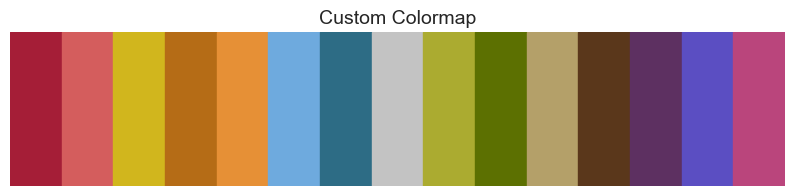

In [64]:
# define colors for the models

# base colors of QDS
base_colors = {
    "red": (165/255, 30/255, 55/255),
    "gray": (195/255, 195/255, 195/255),
    "lightgray": (203/255, 203/255, 203/255),
    "gold": (180/255, 160/255, 105/255),
}

hex_colors = [
    "#A51E37", "#D45D5D", "#D1B61D", "#B56C16", "#E69036",
    "#6EAADE", "#2D6C85", "#C3C3C3", "#ABAB30", "#5C7001",
    "#B4A069", "#5A371B", "#5D3061", "#5B4EC2", "#BA457C"
]

# Create a ListedColormap
custom_cmap = ListedColormap(hex_colors, name = "custom15")


# Visualize the colors
fig, ax = plt.subplots(figsize=(10, 2))
for i, color in enumerate(hex_colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, len(hex_colors))
ax.set_ylim(0, 1)
ax.axis("off")
plt.title("Custom Colormap", fontsize=14)
plt.show()

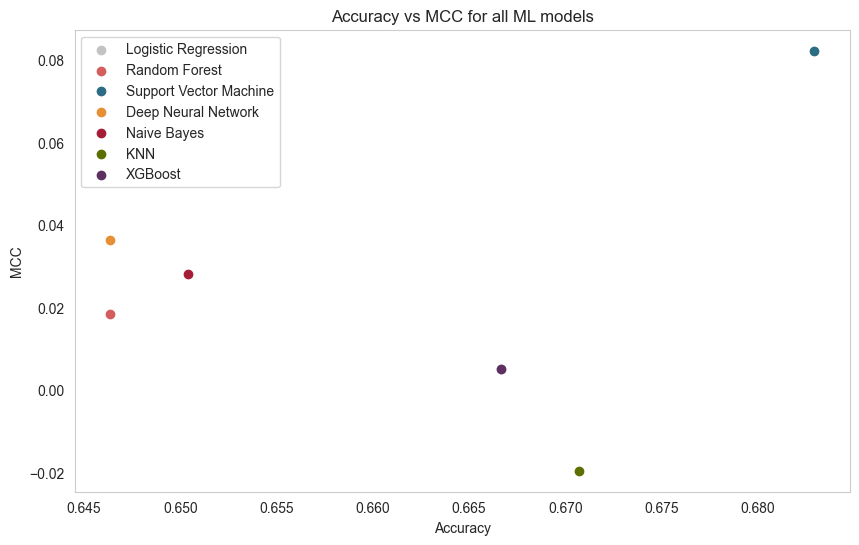

In [65]:
# plot accuracy (x-axis) and mcc (y-axis) for all models
plt.figure(figsize = (10, 6))

plt.scatter(metrics_lr["accuracy"], metrics_lr["mcc"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(metrics_rf["accuracy"], metrics_rf["mcc"], label = "Random Forest", color = hex_colors[1])
plt.scatter(metrics_svc["accuracy"], metrics_svc["mcc"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(metrics_dnn["accuracy"], metrics_dnn["mcc"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_nb["accuracy"], metrics_nb["mcc"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(metrics_knn["accuracy"], metrics_knn["mcc"], label = "KNN", color = hex_colors[9])
plt.scatter(metrics_xgb["accuracy"], metrics_xgb["mcc"], label = "XGBoost", color = hex_colors[12])

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC for all ML models")
plt.legend()
plt.grid()
# plt.show()

# save as png
# plt.savefig("../doc/figs/accuracy_mcc.png", dpi = 300, bbox_inches = "tight")

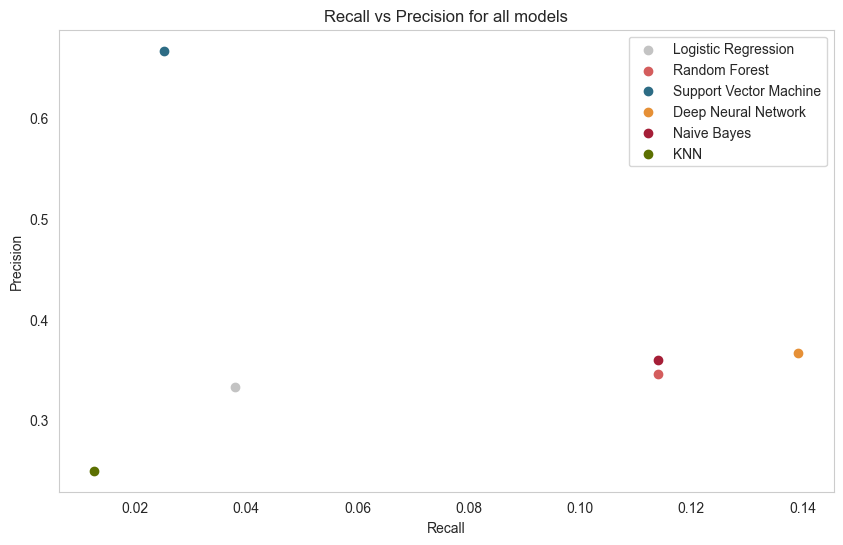

In [66]:
# plot recall vs precision for all models
plt.figure(figsize = (10, 6))
plt.scatter(metrics_lr["recall"], metrics_lr["precision"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(metrics_rf["recall"], metrics_rf["precision"], label = "Random Forest", color = hex_colors[1])
plt.scatter(metrics_svc["recall"], metrics_svc["precision"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(metrics_dnn["recall"], metrics_dnn["precision"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_nb["recall"], metrics_nb["precision"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(metrics_knn["recall"], metrics_knn["precision"], label = "KNN", color = hex_colors[9])

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall vs Precision for all models")
plt.legend()
plt.grid()
plt.show()

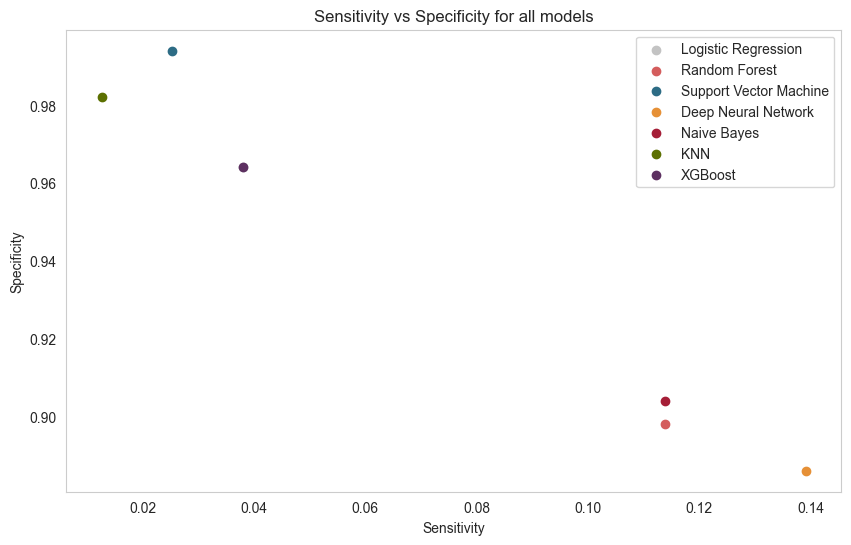

In [67]:
# sensitivity vs specificity
plt.figure(figsize = (10, 6))
plt.scatter(metrics_lr["sensitivity"], metrics_lr["specificity"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(metrics_rf["sensitivity"], metrics_rf["specificity"], label = "Random Forest", color = hex_colors[1])
plt.scatter(metrics_svc["sensitivity"], metrics_svc["specificity"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(metrics_dnn["sensitivity"], metrics_dnn["specificity"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_nb["sensitivity"], metrics_nb["specificity"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(metrics_knn["sensitivity"], metrics_knn["specificity"], label = "KNN", color = hex_colors[9])
plt.scatter(metrics_xgb["sensitivity"], metrics_xgb["specificity"], label = "XGBoost", color = hex_colors[12])

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity for all models")
plt.legend()
plt.grid()

# # save as png
# plt.savefig("../doc/figs/sensitivity_specificity.png", dpi = 300, bbox_inches = "tight")

**Sensitivity** = Wie viel Prozent der predicted positives sind wirklich positiv. Wie viele der tatsächlich kranken Personen hat das Model erkannt?

**Specificity** = Wie viel Prozent der predicted negatives sind wirklich negativ. Wie viele der tatsächlich gesunden Personen hat das Model richtig ausgeschlossen (negativ predicted)?

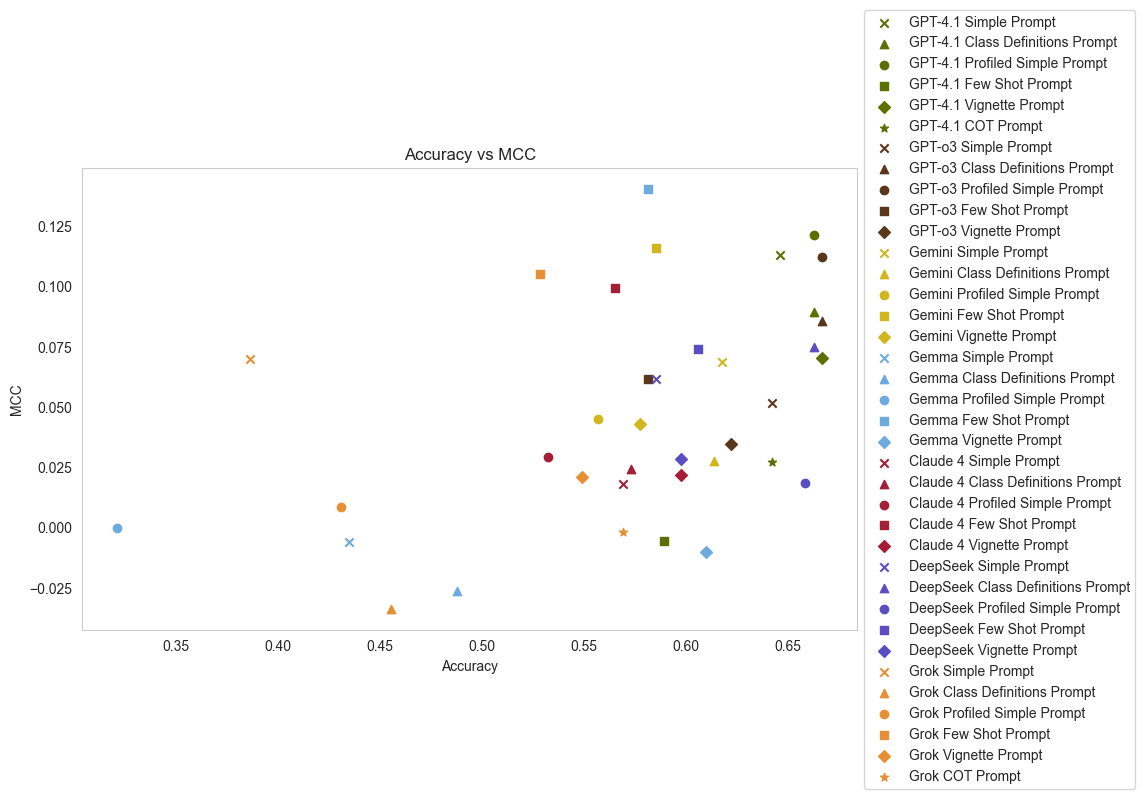

In [116]:
# plot all simple prompts for LLMs: MCC vs Accuracy
plt.figure(figsize = (10, 6))

plt.scatter(metrics_GPT_simple_prompt["accuracy"], metrics_GPT_simple_prompt["mcc"], label = "GPT-4.1 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_class_def_prompt["accuracy"], metrics_GPT_class_def_prompt["mcc"], label = "GPT-4.1 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_profiled_simple_prompt["accuracy"], metrics_GPT_profiled_simple_prompt["mcc"], label = "GPT-4.1 Profiled Simple Prompt", color = hex_colors[9], marker = "o")
plt.scatter(metrics_GPT_few_shot_prompt["accuracy"], metrics_GPT_few_shot_prompt["mcc"], label = "GPT-4.1 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_vignette_prompt["accuracy"], metrics_GPT_vignette_prompt["mcc"], label = "GPT-4.1 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_cot_prompt["accuracy"], metrics_GPT_cot_prompt["mcc"], label = "GPT-4.1 COT Prompt", color = hex_colors[9], marker = "*")

# plt.scatter(metrics_GPT_o3_simple_prompt_nothinking["accuracy"], metrics_GPT_o3_simple_prompt_nothinking["mcc"], label = "GPT-o3 Simple Prompt NO THINK", color = hex_colors[11], marker = "x")
plt.scatter(metrics_GPT_o3_simple_prompt["accuracy"], metrics_GPT_o3_simple_prompt["mcc"], label = "GPT-o3 Simple Prompt", color = hex_colors[11], marker = "x")
plt.scatter(metrics_GPT_o3_class_definitions_prompt["accuracy"], metrics_GPT_o3_class_definitions_prompt["mcc"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[11], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["accuracy"], metrics_GPT_o3_profiled_simple_prompt["mcc"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[11], marker = "o")
plt.scatter(metrics_GPT_o3_few_shot_prompt["accuracy"], metrics_GPT_o3_few_shot_prompt["mcc"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[11], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["accuracy"], metrics_GPT_o3_vignette_prompt["mcc"], label = "GPT-o3 Vignette Prompt", color = hex_colors[11], marker = "D")

plt.scatter(metrics_Gemini_simple_prompt["accuracy"], metrics_Gemini_simple_prompt["mcc"], label = "Gemini Simple Prompt", color = hex_colors[2], marker = "x")
plt.scatter(metrics_Gemini_class_def_prompt["accuracy"], metrics_Gemini_class_def_prompt["mcc"], label = "Gemini Class Definitions Prompt", color = hex_colors[2], marker = "^")
plt.scatter(metrics_Gemini_profiled_simple_prompt["accuracy"], metrics_Gemini_profiled_simple_prompt["mcc"], label = "Gemini Profiled Simple Prompt", color = hex_colors[2], marker = "o")
plt.scatter(metrics_Gemini_few_shot_prompt["accuracy"], metrics_Gemini_few_shot_prompt["mcc"], label = "Gemini Few Shot Prompt", color = hex_colors[2], marker = "s")
plt.scatter(metrics_Gemini_vignette_prompt["accuracy"], metrics_Gemini_vignette_prompt["mcc"], label = "Gemini Vignette Prompt", color = hex_colors[2], marker = "D")

plt.scatter(metrics_Gemma_simple_prompt["accuracy"], metrics_Gemma_simple_prompt["mcc"], label = "Gemma Simple Prompt", color = hex_colors[5], marker = "x")
plt.scatter(metrics_Gemma_class_def_prompt["accuracy"], metrics_Gemma_class_def_prompt["mcc"], label = "Gemma Class Definitions Prompt", color = hex_colors[5], marker = "^")
plt.scatter(metrics_Gemma_profiled_simple_prompt["accuracy"], metrics_Gemma_profiled_simple_prompt["mcc"], label = "Gemma Profiled Simple Prompt", color = hex_colors[5], marker = "o")
plt.scatter(metrics_Gemma_few_shot_prompt["accuracy"], metrics_Gemma_few_shot_prompt["mcc"], label = "Gemma Few Shot Prompt", color = hex_colors[5], marker = "s")
plt.scatter(metrics_Gemma_vignette_prompt["accuracy"], metrics_Gemma_vignette_prompt["mcc"], label = "Gemma Vignette Prompt", color = hex_colors[5], marker = "D")

plt.scatter(metrics_Claude_4_simple_prompt["accuracy"], metrics_Claude_4_simple_prompt["mcc"], label = "Claude 4 Simple Prompt", color = hex_colors[0], marker = "x")
plt.scatter(metrics_Claude_4_class_def_prompt["accuracy"], metrics_Claude_4_class_def_prompt["mcc"], label = "Claude 4 Class Definitions Prompt", color = hex_colors[0], marker = "^")
plt.scatter(metrics_Claude_4_profiled_simple_prompt["accuracy"], metrics_Claude_4_profiled_simple_prompt["mcc"], label = "Claude 4 Profiled Simple Prompt", color = hex_colors[0], marker = "o")
plt.scatter(metrics_Claude_4_few_shot_prompt["accuracy"], metrics_Claude_4_few_shot_prompt["mcc"], label = "Claude 4 Few Shot Prompt", color = hex_colors[0], marker = "s")
plt.scatter(metrics_Claude_4_vignette_prompt["accuracy"], metrics_Claude_4_vignette_prompt["mcc"], label = "Claude 4 Vignette Prompt", color = hex_colors[0], marker = "D")
# plt.scatter(metrics_Claude_37_simple_prompt["accuracy"], metrics_Claude_37_simple_prompt["mcc"], label = "Claude 3.7 Simple Prompt", color = hex_colors[0], marker = ".")
# plt.scatter(metrics_Claude_37_class_def_prompt["accuracy"], metrics_Claude_37_class_def_prompt["mcc"], label = "Claude 3.7 Class Definitions Prompt", color = hex_colors[0], marker = "^")

plt.scatter(metrics_DeepSeek_simple_prompt["accuracy"], metrics_DeepSeek_simple_prompt["mcc"], label = "DeepSeek Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_DeepSeek_class_def_prompt["accuracy"], metrics_DeepSeek_class_def_prompt["mcc"], label = "DeepSeek Class Definitions Prompt", color = hex_colors[13], marker = "^")
plt.scatter(metrics_DeepSeek_profiled_simple_prompt["accuracy"], metrics_DeepSeek_profiled_simple_prompt["mcc"], label = "DeepSeek Profiled Simple Prompt", color = hex_colors[13], marker = "o")
plt.scatter(metrics_DeepSeek_few_shot_prompt["accuracy"], metrics_DeepSeek_few_shot_prompt["mcc"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = "s")
plt.scatter(metrics_DeepSeek_vignette_prompt["accuracy"], metrics_DeepSeek_vignette_prompt["mcc"], label = "DeepSeek Vignette Prompt", color = hex_colors[13], marker = "D")

plt.scatter(metrics_Grok_simple_prompt["accuracy"], metrics_Grok_simple_prompt["mcc"], label = "Grok Simple Prompt", color = hex_colors[4], marker = "x")
plt.scatter(metrics_Grok_class_def_prompt["accuracy"], metrics_Grok_class_def_prompt["mcc"], label = "Grok Class Definitions Prompt", color = hex_colors[4], marker = "^")
plt.scatter(metrics_Grok_profiled_simple_prompt["accuracy"], metrics_Grok_profiled_simple_prompt["mcc"], label = "Grok Profiled Simple Prompt", color = hex_colors[4], marker = "o")
plt.scatter(metrics_Grok_few_shot_prompt["accuracy"], metrics_Grok_few_shot_prompt["mcc"], label = "Grok Few Shot Prompt", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_vignette_prompt["accuracy"], metrics_Grok_vignette_prompt["mcc"], label = "Grok Vignette Prompt", color = hex_colors[4], marker = "D")
plt.scatter(metrics_Grok_cot_prompt["accuracy"], metrics_Grok_cot_prompt["mcc"], label = "Grok COT Prompt", color = hex_colors[4], marker = "*")

# plt.scatter(metrics_pov_all_models["accuracy"], metrics_pov_all_models["mcc"], label = "POV All Models", color = "black", marker = "P")
# plt.scatter(metrics_pov_ml_votes["accuracy"], metrics_pov_ml_votes["mcc"], label = "POV ML Votes", color = "black", marker = "X")
# plt.scatter(metrics_pov_simple_votes["accuracy"], metrics_pov_simple_votes["mcc"], label = "POV Simple Votes", color = "black", marker = "x")
# plt.scatter(metrics_pov_class_definitions_votes["accuracy"], metrics_pov_class_definitions_votes["mcc"], label = "POV Class Definitions Votes", color = "black", marker = "^")
# plt.scatter(metrics_pov_profiled_simple_votes["accuracy"], metrics_pov_profiled_simple_votes["mcc"], label = "POV Profiled Simple Votes", color = "black", marker = "o")
# plt.scatter(metrics_pov_few_shot_votes["accuracy"], metrics_pov_few_shot_votes["mcc"], label = "POV Few Shot Votes", color = "black", marker = "s")
# plt.scatter(metrics_pov_vignette_votes["accuracy"], metrics_pov_vignette_votes["mcc"], label = "POV Vignette Votes", color = "black", marker = "D")
# plt.scatter(metrics_pov_cot_votes["accuracy"], metrics_pov_cot_votes["mcc"], label = "POV COT Votes", color = "black", marker = "*")

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

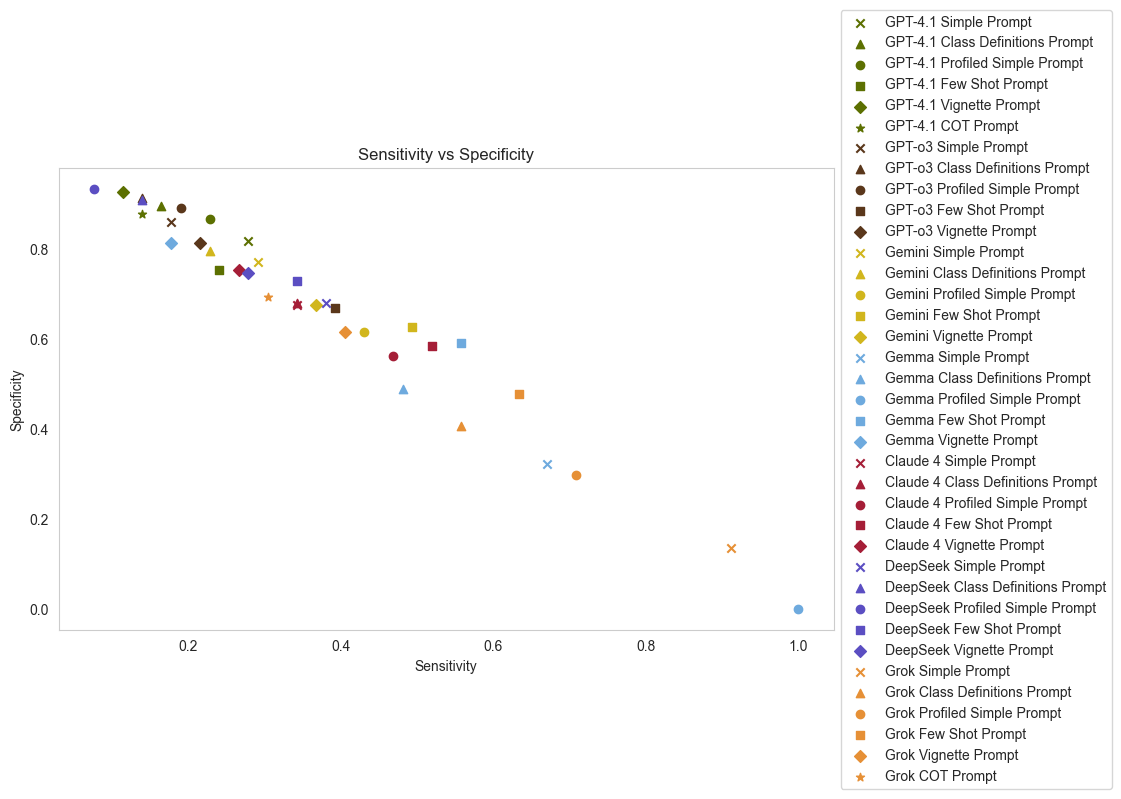

In [117]:
# plot sensitivity vs specificity for all simple prompts
plt.figure(figsize = (10, 6))

plt.scatter(metrics_GPT_simple_prompt["sensitivity"], metrics_GPT_simple_prompt["specificity"], label = "GPT-4.1 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_class_def_prompt["sensitivity"], metrics_GPT_class_def_prompt["specificity"], label = "GPT-4.1 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_profiled_simple_prompt["sensitivity"], metrics_GPT_profiled_simple_prompt["specificity"], label = "GPT-4.1 Profiled Simple Prompt", color = hex_colors[9], marker = "o")
plt.scatter(metrics_GPT_few_shot_prompt["sensitivity"], metrics_GPT_few_shot_prompt["specificity"], label = "GPT-4.1 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_vignette_prompt["sensitivity"], metrics_GPT_vignette_prompt["specificity"], label = "GPT-4.1 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_cot_prompt["sensitivity"], metrics_GPT_cot_prompt["specificity"], label = "GPT-4.1 COT Prompt", color = hex_colors[9], marker = "*")

# plt.scatter(metrics_GPT_o3_simple_prompt_nothinking["sensitivity"], metrics_GPT_o3_simple_prompt_nothinking["specificity"], label = "GPT-o3 Simple Prompt NO THINK", color = hex_colors[11], marker = "x")
plt.scatter(metrics_GPT_o3_simple_prompt["sensitivity"], metrics_GPT_o3_simple_prompt["specificity"], label = "GPT-o3 Simple Prompt", color = hex_colors[11], marker = "x")
plt.scatter(metrics_GPT_o3_class_definitions_prompt["sensitivity"], metrics_GPT_o3_class_definitions_prompt["specificity"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[11], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["sensitivity"], metrics_GPT_o3_profiled_simple_prompt["specificity"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[11], marker = "o")
plt.scatter(metrics_GPT_o3_few_shot_prompt["sensitivity"], metrics_GPT_o3_few_shot_prompt["specificity"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[11], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["sensitivity"], metrics_GPT_o3_vignette_prompt["specificity"], label = "GPT-o3 Vignette Prompt", color = hex_colors[11], marker = "D")

plt.scatter(metrics_Gemini_simple_prompt["sensitivity"], metrics_Gemini_simple_prompt["specificity"], label = "Gemini Simple Prompt", color = hex_colors[2], marker = "x")
plt.scatter(metrics_Gemini_class_def_prompt["sensitivity"], metrics_Gemini_class_def_prompt["specificity"], label = "Gemini Class Definitions Prompt", color = hex_colors[2], marker = "^")
plt.scatter(metrics_Gemini_profiled_simple_prompt["sensitivity"], metrics_Gemini_profiled_simple_prompt["specificity"], label = "Gemini Profiled Simple Prompt", color = hex_colors[2], marker = "o")
plt.scatter(metrics_Gemini_few_shot_prompt["sensitivity"], metrics_Gemini_few_shot_prompt["specificity"], label = "Gemini Few Shot Prompt", color = hex_colors[2], marker = "s")
plt.scatter(metrics_Gemini_vignette_prompt["sensitivity"], metrics_Gemini_vignette_prompt["specificity"], label = "Gemini Vignette Prompt", color = hex_colors[2], marker = "D")

plt.scatter(metrics_Gemma_simple_prompt["sensitivity"], metrics_Gemma_simple_prompt["specificity"], label = "Gemma Simple Prompt", color = hex_colors[5], marker = "x")
plt.scatter(metrics_Gemma_class_def_prompt["sensitivity"], metrics_Gemma_class_def_prompt["specificity"], label = "Gemma Class Definitions Prompt", color = hex_colors[5], marker = "^")
plt.scatter(metrics_Gemma_profiled_simple_prompt["sensitivity"], metrics_Gemma_profiled_simple_prompt["specificity"], label = "Gemma Profiled Simple Prompt", color = hex_colors[5], marker = "o")
plt.scatter(metrics_Gemma_few_shot_prompt["sensitivity"], metrics_Gemma_few_shot_prompt["specificity"], label = "Gemma Few Shot Prompt", color = hex_colors[5], marker = "s")
plt.scatter(metrics_Gemma_vignette_prompt["sensitivity"], metrics_Gemma_vignette_prompt["specificity"], label = "Gemma Vignette Prompt", color = hex_colors[5], marker = "D")

plt.scatter(metrics_Claude_4_simple_prompt["sensitivity"], metrics_Claude_4_simple_prompt["specificity"], label = "Claude 4 Simple Prompt", color = hex_colors[0], marker = "x")
plt.scatter(metrics_Claude_4_class_def_prompt["sensitivity"], metrics_Claude_4_class_def_prompt["specificity"], label = "Claude 4 Class Definitions Prompt", color = hex_colors[0], marker = "^")
plt.scatter(metrics_Claude_4_profiled_simple_prompt["sensitivity"], metrics_Claude_4_profiled_simple_prompt["specificity"], label = "Claude 4 Profiled Simple Prompt", color = hex_colors[0], marker = "o")
plt.scatter(metrics_Claude_4_few_shot_prompt["sensitivity"], metrics_Claude_4_few_shot_prompt["specificity"], label = "Claude 4 Few Shot Prompt", color = hex_colors[0], marker = "s")
plt.scatter(metrics_Claude_4_vignette_prompt["sensitivity"], metrics_Claude_4_vignette_prompt["specificity"], label = "Claude 4 Vignette Prompt", color = hex_colors[0], marker = "D")
# plt.scatter(metrics_Claude37_simple_prompt["sensitivity"], metrics_Claude_37_simple_prompt["specificity"], label = "Claude 3.7 Simple Prompt", color = hex_colors[0], marker = "x")
# plt.scatter(metrics_Claude37_class_def_prompt["sensitivity"], metrics_Claude_37_class_def_prompt["specificity"], label = "Claude 3.7 Class Definitions Prompt", color = hex_colors[0], marker = "^")

plt.scatter(metrics_DeepSeek_simple_prompt["sensitivity"], metrics_DeepSeek_simple_prompt["specificity"], label = "DeepSeek Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_DeepSeek_class_def_prompt["sensitivity"], metrics_DeepSeek_class_def_prompt["specificity"], label = "DeepSeek Class Definitions Prompt", color = hex_colors[13], marker = "^")
plt.scatter(metrics_DeepSeek_profiled_simple_prompt["sensitivity"], metrics_DeepSeek_profiled_simple_prompt["specificity"], label = "DeepSeek Profiled Simple Prompt", color = hex_colors[13], marker = "o")
plt.scatter(metrics_DeepSeek_few_shot_prompt["sensitivity"], metrics_DeepSeek_few_shot_prompt["specificity"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = "s")
plt.scatter(metrics_DeepSeek_vignette_prompt["sensitivity"], metrics_DeepSeek_vignette_prompt["specificity"], label = "DeepSeek Vignette Prompt", color = hex_colors[13], marker = "D")

plt.scatter(metrics_Grok_simple_prompt["sensitivity"], metrics_Grok_simple_prompt["specificity"], label = "Grok Simple Prompt", color = hex_colors[4], marker = "x")
plt.scatter(metrics_Grok_class_def_prompt["sensitivity"], metrics_Grok_class_def_prompt["specificity"], label = "Grok Class Definitions Prompt", color = hex_colors[4], marker = "^")
plt.scatter(metrics_Grok_profiled_simple_prompt["sensitivity"], metrics_Grok_profiled_simple_prompt["specificity"], label = "Grok Profiled Simple Prompt", color = hex_colors[4], marker = "o")
plt.scatter(metrics_Grok_few_shot_prompt["sensitivity"], metrics_Grok_few_shot_prompt["specificity"], label = "Grok Few Shot Prompt", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_vignette_prompt["sensitivity"], metrics_Grok_vignette_prompt["specificity"], label = "Grok Vignette Prompt", color = hex_colors[4], marker = "D")
plt.scatter(metrics_Grok_cot_prompt["sensitivity"], metrics_Grok_cot_prompt["specificity"], label = "Grok COT Prompt", color = hex_colors[4], marker = "*")

# plt.scatter(metrics_pov_all_models["sensitivity"], metrics_pov_all_models["specificity"], label = "POV All Models", color = "black", marker = "P")
# plt.scatter(metrics_pov_ml_votes["sensitivity"], metrics_pov_ml_votes["specificity"], label = "POV ML Votes", color = "black", marker = "X")
# plt.scatter(metrics_pov_simple_votes["sensitivity"], metrics_pov_simple_votes["specificity"], label = "POV Simple Votes", color = "black", marker = "x")
# plt.scatter(metrics_pov_class_definitions_votes["sensitivity"], metrics_pov_class_definitions_votes["specificity"], label = "POV Class Definitions Votes", color = "black", marker = "^")
# plt.scatter(metrics_pov_profiled_simple_votes["sensitivity"], metrics_pov_profiled_simple_votes["specificity"], label = "POV Profiled Simple Votes", color = "black", marker = "o")
# plt.scatter(metrics_pov_few_shot_votes["sensitivity"], metrics_pov_few_shot_votes["specificity"], label = "POV Few Shot Votes", color = "black", marker = "s")
# plt.scatter(metrics_pov_vignette_votes["sensitivity"], metrics_pov_vignette_votes["specificity"], label = "POV Vignette Votes", color = "black", marker = "D")
# plt.scatter(metrics_pov_cot_votes["sensitivity"], metrics_pov_cot_votes["specificity"], label = "POV COT Votes", color = "black", marker = "*")

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

## Unification Approaches

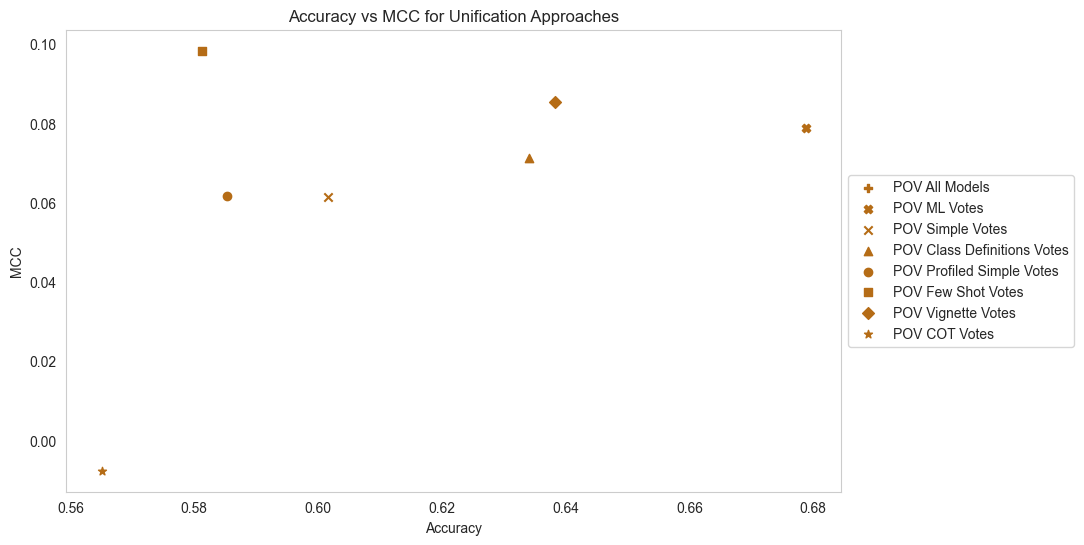

In [113]:
# plot all unification approaches: MCC vs Accuracy
plt.figure(figsize = (10, 6))

plt.scatter(metrics_pov_all_models["accuracy"], metrics_pov_all_models["mcc"], label = "POV All Models", color = hex_colors[3], marker = "P")
plt.scatter(metrics_pov_ml_votes["accuracy"], metrics_pov_ml_votes["mcc"], label = "POV ML Votes", color = hex_colors[3], marker = "X")
plt.scatter(metrics_pov_simple_votes["accuracy"], metrics_pov_simple_votes["mcc"], label = "POV Simple Votes", color = hex_colors[3], marker = "x")
plt.scatter(metrics_pov_class_definitions_votes["accuracy"], metrics_pov_class_definitions_votes["mcc"], label = "POV Class Definitions Votes", color = hex_colors[3], marker = "^")
plt.scatter(metrics_pov_profiled_simple_votes["accuracy"], metrics_pov_profiled_simple_votes["mcc"], label = "POV Profiled Simple Votes", color = hex_colors[3], marker = "o")
plt.scatter(metrics_pov_few_shot_votes["accuracy"], metrics_pov_few_shot_votes["mcc"], label = "POV Few Shot Votes", color = hex_colors[3], marker = "s")
plt.scatter(metrics_pov_vignette_votes["accuracy"], metrics_pov_vignette_votes["mcc"], label = "POV Vignette Votes", color = hex_colors[3], marker = "D")
plt.scatter(metrics_pov_cot_votes["accuracy"], metrics_pov_cot_votes["mcc"], label = "POV COT Votes", color = hex_colors[3], marker = "*")


plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC for Unification Approaches")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()


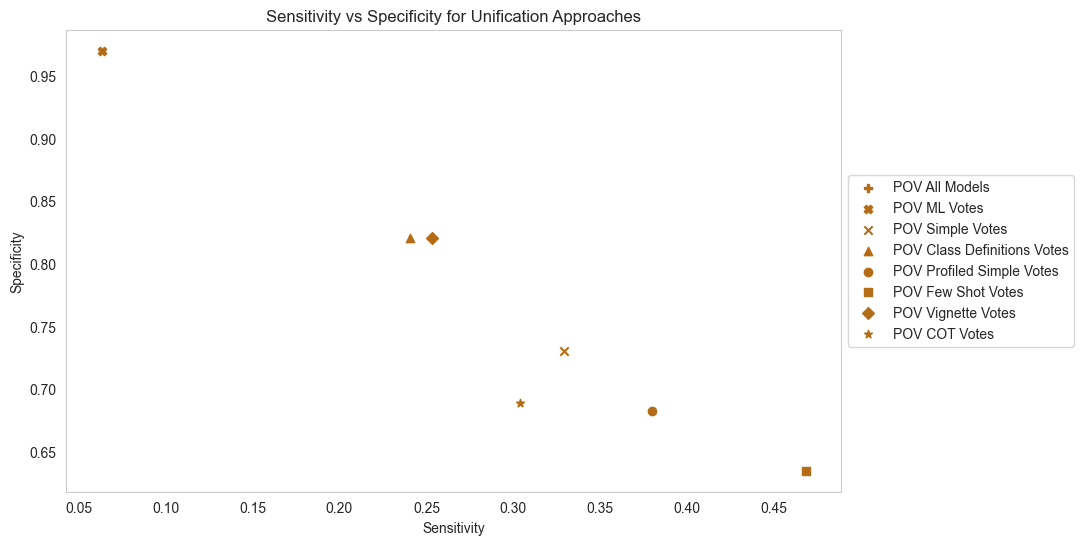

In [114]:
# plot sensitivity vs specificity for all unification approaches
plt.figure(figsize = (10, 6))

plt.scatter(metrics_pov_all_models["sensitivity"], metrics_pov_all_models["specificity"], label = "POV All Models", color = hex_colors[3], marker = "P")
plt.scatter(metrics_pov_ml_votes["sensitivity"], metrics_pov_ml_votes["specificity"], label = "POV ML Votes", color = hex_colors[3], marker = "X")
plt.scatter(metrics_pov_simple_votes["sensitivity"], metrics_pov_simple_votes["specificity"], label = "POV Simple Votes", color = hex_colors[3], marker = "x")
plt.scatter(metrics_pov_class_definitions_votes["sensitivity"], metrics_pov_class_definitions_votes["specificity"], label = "POV Class Definitions Votes", color = hex_colors[3], marker = "^")
plt.scatter(metrics_pov_profiled_simple_votes["sensitivity"], metrics_pov_profiled_simple_votes["specificity"], label = "POV Profiled Simple Votes", color = hex_colors[3], marker = "o")
plt.scatter(metrics_pov_few_shot_votes["sensitivity"], metrics_pov_few_shot_votes["specificity"], label = "POV Few Shot Votes", color = hex_colors[3], marker = "s")
plt.scatter(metrics_pov_vignette_votes["sensitivity"], metrics_pov_vignette_votes["specificity"], label = "POV Vignette Votes", color = hex_colors[3], marker = "D")
plt.scatter(metrics_pov_cot_votes["sensitivity"], metrics_pov_cot_votes["specificity"], label = "POV COT Votes", color = hex_colors[3], marker = "*")

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity for Unification Approaches")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

#### Find most misclassified rows in X_test

In [70]:
# count for each row the number of correct and misclassified predictions summed over all models, I want to identify a row in X_test that was misclassified the most often by all models: create a new column in X_test called "misclassified_count" and set it to the number of misclassified predictions for each row

all_prompts_models = [
    y_pred_GPT_simple_prompt,
    y_pred_GPT_class_def_prompt,
    y_pred_GPT_profiled_simple_prompt,
    y_pred_GPT_few_shot_prompt,
    y_pred_GPT_vignette_prompt,
    y_pred_Gemini_simple_prompt,
    y_pred_Gemini_class_def_prompt,
    y_pred_Gemini_profiled_simple_prompt,
    y_pred_Gemini_few_shot_prompt,
    y_pred_Gemini_vignette_prompt,
    y_pred_Gemma_simple_prompt,
    y_pred_Gemma_class_def_prompt,
    y_pred_Gemma_profiled_simple_prompt,
    y_pred_Gemma_few_shot_prompt,
    y_pred_Gemma_vignette_prompt,
    y_pred_Claude_4_simple_prompt,
    y_pred_Claude_4_class_def_prompt,
    y_pred_Claude_4_profiled_simple_prompt,
    y_pred_Claude_4_few_shot_prompt,
    y_pred_Claude_4_vignette_prompt,
    y_pred_DeepSeek_simple_prompt,
    y_pred_DeepSeek_class_def_prompt,
    y_pred_DeepSeek_profiled_simple_prompt,
    y_pred_DeepSeek_few_shot_prompt,
    y_pred_Grok_simple_prompt,
    y_pred_Grok_class_def_prompt,
    y_pred_Grok_profiled_simple_prompt,
    y_pred_Grok_few_shot_prompt,
    y_pred_Grok_vignette_prompt
]
X_test_reset_idx = X_test.reset_index(drop = True)
y_test_reset_idx = y_test.reset_index(drop = True)

X_test_reset_idx["misclassified_count"] = 0

for row in X_test_reset_idx.index:
    for model in all_prompts_models:
        if model["y_pred"][row] != y_test_reset_idx[row]:
            X_test_reset_idx.at[row, "misclassified_count"] += 1

# find top 10 rows with the most misclassifications (index and row)
top_misclassified_rows = X_test_reset_idx.nlargest(10, "misclassified_count")
# print the top 10 rows with the most misclassifications
# print(top_misclassified_rows[["misclassified_count"] + X_test_reset_idx.columns.tolist()])

# print y_test for the top 10 rows with the most misclassifications
print("y_test for the top 10 rows with the most misclassifications:")
print(y_test_reset_idx[top_misclassified_rows.index])

# find original index of X_test for index 95
print(top_misclassified_rows.index[1])
original_index = X_test.index[top_misclassified_rows.index[1]]
print(f"Original index of the second most misclassified row: {original_index}")

y_test for the top 10 rows with the most misclassifications:
22     0.0
95     1.0
163    0.0
170    1.0
188    0.0
87     0.0
135    0.0
152    1.0
16     1.0
24     1.0
Name: hpi, dtype: float64
95
Original index of the second most misclassified row: 174


In [71]:
# find top 5 most similar row in X_train to the second most misclassified row in X_test
from sklearn.metrics.pairwise import cosine_similarity
# Get the second most misclassified row in X_test
second_most_misclassified_row = X_test_reset_idx.iloc[top_misclassified_rows.index[1]]
# Calculate cosine similarity between the second most misclassified row and all rows in X_train
similarities = cosine_similarity([second_most_misclassified_row[:-1]], X_train)[0]
# Get the indices of the top 5 most similar rows in X_train
top_5_similar_indices = similarities.argsort()[-5:][::-1]
print(top_5_similar_indices)

[438 764 823 556 953]


# 2 Feature importance

# 3 Misclassifications

In [72]:
simple_prompt_reasons_df = pd.read_csv("reasons_miscl_LLMs/GPT/simple_prompt_reasons.csv", sep = ",")
class_def_prompt_reasons_df = pd.read_csv("reasons_miscl_LLMs/GPT/class_def_prompt_reasons.csv", sep = ",")
profiled_simple_prompt_reasons_df = pd.read_csv(
    "reasons_miscl_LLMs/GPT/profiled_simple_prompt_reasons.csv", sep = ",")
few_shot_prompt_reasons_df = pd.read_csv("reasons_miscl_LLMs/GPT/few_shot_prompt_reasons.csv", sep = ",")
vignette_prompt_reasons_df = pd.read_csv("reasons_miscl_LLMs/GPT/vignette_prompt_reasons.csv", sep = ",")

In [73]:
simple_cases_df = pd.read_csv("reasons_miscl_LLMs/GPT/simple_cases_GPT_df.csv", sep = ",")
class_def_cases_df = pd.read_csv("reasons_miscl_LLMs/GPT/class_def_cases_GPT_df.csv", sep = ",")
profiled_cases_df = pd.read_csv("reasons_miscl_LLMs/GPT/profiled_cases_GPT_df.csv", sep = ",")
few_shot_cases_df = pd.read_csv("reasons_miscl_LLMs/GPT/few_shot_cases_GPT_df.csv", sep = ",")
vignette_cases_df = pd.read_csv("reasons_miscl_LLMs/GPT/vignette_cases_GPT_df.csv", sep = ",")

In [74]:
simple_cases_df["total"][0]

np.int64(246)

In [75]:
simple_cases_df = simple_cases_df.to_dict()
simple_prompt_reasons_df = simple_prompt_reasons_df.to_dict()

In [76]:
# Sankey components
labels = [
    "Total",              # 0
    "Correct",            # 1
    "Misclassified",      # 2
    *simple_prompt_reasons_df.keys()       # 3+
]

# Links: from -> to -> value
sources = [0, 0]  # Total -> Correct, Misclassified
targets = [1, 2]
values = [simple_cases_df["correct"], simple_cases_df["missclassified"]]

# Add each misclassification reason
for i, (reason, count) in enumerate(simple_prompt_reasons_df.items()):
    sources.append(2)                # From Misclassified
    targets.append(3 + i)            # To each reason node
    values.append(count)

In [77]:
# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color="black", width=0.5),
        label = labels
    ),
    link=dict(
        source = sources,
        target = targets,
        value = values
    )
)])

fig.update_layout(title_text = "Sankey Diagram of Prediction Outcomes and Misclassification Reasons", font_size=12)
fig.show()

In [78]:
# # 3. Build Sankey data as list of dicts (or DataFrame)
# sankey_data = [
#     {'source': 'Total', 'target': 'Correct', 'value': simple_cases_df["correct"]},
#     {'source': 'Total', 'target': 'Misclassified', 'value': simple_cases_df["missclassified"]}
# ]
#
# # Add misclassification reasons
# for reason, count in simple_prompt_reasons_df.items():
#     sankey_data.append({'source': 'Misclassified', 'target': reason, 'value': count})
#
# # 4. Convert to DataFrame
# sankey_df = pd.DataFrame(sankey_data)
#
# # 5. Plot with HoloViews
# sankey = hv.Sankey(sankey_df)
#
# sankey.opts(
#     opts.Sankey(
#         width=800,
#         height=500,
#         node_width=20,
#         node_padding=10,
#         edge_color='source',
#         label_position='left',
#         cmap='Category20'
#     )
# )

In [79]:
sankey_df

NameError: name 'sankey_df' is not defined

In [243]:
# import plotly.graph_objects as go
#
# # 1. Total number of y_pred_ML
# total_cases = simple_cases_df["total"]
# num_misclassified = simple_cases_df["missclassified"]
# num_correct = simple_cases_df["correct"]
#
# # 3. Misclassification reasons from your vignette_prompt_reasons_df (hardcoded for this example)
# reasons = {
#     "Lack of context": 69,
#     "Prediction with Abstention": 17,
#     "Lack of examples": 20,
#     "Knowledge conflicts": 18,
#     "Lack of counterfactual demonstrations": 5,
#     "Lack of feedback": 4
# }
#
# # Sankey components
# labels = [
#     "Total",              # 0
#     "Correct",            # 1
#     "Misclassified",      # 2
#     *reasons.keys()       # 3+
# ]
#
# # Links: from -> to -> value
# sources = [0, 0]  # Total -> Correct, Misclassified
# targets = [1, 2]
# values = [num_correct, num_misclassified]
#
# # Add each misclassification reason
# for i, (reason, count) in enumerate(reasons.items()):
#     sources.append(2)                # From Misclassified
#     targets.append(3 + i)            # To each reason node
#     values.append(count)
#
# # Create Sankey diagram
# fig = go.Figure(data=[go.Sankey(
#     node=dict(
#         pad=15,
#         thickness=20,
#         line=dict(color="black", width=0.5),
#         label=labels
#     ),
#     link=dict(
#         source=sources,
#         target=targets,
#         value=values
#     )
# )])
#
# fig.update_layout(title_text="Sankey Diagram of Prediction Outcomes and Misclassification Reasons", font_size=12)
# fig.show()
